In [1]:
import pickle
import osmnx as ox
import numpy as np
from tools import *

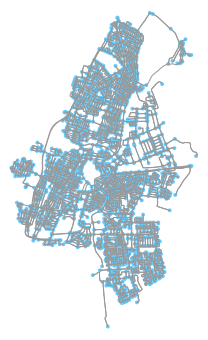

(<Figure size 420.286x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e76a8b3988>)

In [2]:
#open Haarlem Graph
G = pickle.load(open('graphs\\Haarlem.graph','rb'))
ox.plot_graph(G)

## Setting coefficients

In [3]:
Ca = 0.3
Cr = 0.0032
m = 90 #kg
v = 20/3.6 #m/s
g = 9.81 #m/s²
i = 0 #m/m
base_pow = Ca*v**3 + (m*g*(i+Cr))*v
length_cutoff = 5000 #m
work_cutoff = base_pow*length_cutoff/v # same as length cutoff considering everything flat

In [12]:
get_edge_impedance(G, power=base_pow, Ca=Ca, Cr=Cr)

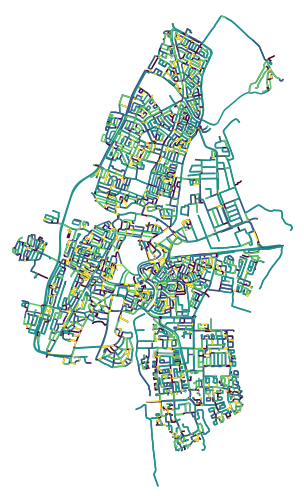

(<Figure size 630.429x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e76ccff1c8>)

In [5]:
#plotting work per meter computed
colors = ox.get_edge_colors_by_attr(G,'work per meter',cmap='viridis')
ox.plot_graph(G, node_size=0, edge_color=colors, fig_height=9, edge_linewidth=1.5)

# Accessibility

The function for accessibility returns the accessibility for every node in the graph (or a proportion of then if $0\leq p<1$).

Work is the work efficiency compared to a flat terrain; Speed is the speed efficiency

In [6]:
work, speed = get_accessibility(G, work_cutoff, p=1, seed=1)

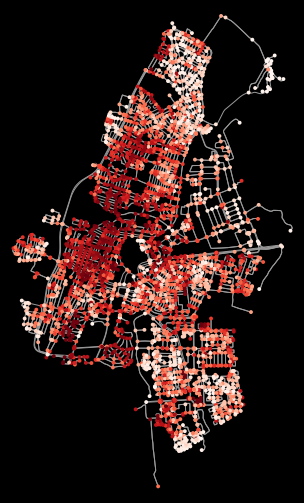

(<Figure size 630.429x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e76ddca1c8>)

In [7]:
#setting accessibility values to nodes
nx.set_node_attributes(G,work,'accessibility')

colors = ox.get_node_colors_by_attr(G,'accessibility',cmap='Reds_r')# reds less accessible, white more accessible
ox.plot_graph(G, node_zorder=3, node_color=colors, fig_height=9,bgcolor='k')

In [8]:
#average accesssibility
np.nanmean(list(work.values()))

0.952215114964286

## Importance

In [9]:
G = get_importance(G, work_cutoff)

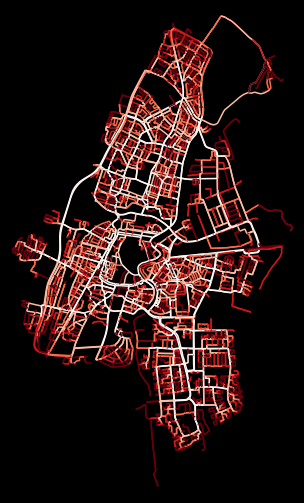

(<Figure size 630.429x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e76a716d88>)

In [10]:
colors = ox.get_edge_colors_by_attr(G,'importance',cmap='Reds_r')# reds less important, white more
ox.plot_graph(G, node_size=0, edge_color=colors, fig_height=9, edge_linewidth=1.5,bgcolor='k')

In [11]:
#Overall
get_overall_importance(G)

0.9296426995572622